In [1]:
"""1 Problema minimi quadrati
Data una matrice A di dimensioni m×n con m ≥ ned un vettore y di m componenti, il problema dei minimi
quadrati `e il seguente:
    α∗ = argmin||Aα − y||2
            α            2
Questo problema di minimo pu`o essere risolto in due modi:
• Metodo delle equazioni normali. se A ha rango massimo il problema di minimo pu`o essere riscritto
in maniera equivalente come segue:
    A.T Aα = A.Ty
Questo sistema si pu`o risolvere utilizzando la fattorizzazione LU o di Cholesky (dato che la matrice
AT A `e simmetrica).
• SVD. se A non ha rango massimo il problema `e sottodeterminato quindi avere pi`u di una soluzione.
In questo casoi si considera la decomposizione SVD della matrice A = USV.T dove U ∈ Rm×m e V.T ∈ R
n×n matrici ortogonali e S ∈ Rm×n diagonale. e da questa decomposizione si pu`o calcolare
esplicitemente la soluzione di minima norma del problema di minimi quadrati come segue:
        r
    α = { (ui.Ty)vi/si
       i=0"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
from scipy.linalg import lu_factor as LUdec 

m = 100
n = 10

A = np.random.rand(m,n)
alpha_test = np.ones(n)
y = A @ alpha_test

print('alpha test', alpha_test)

ATA = A.T@A
ATy = A.T@y

lu, piv = LUdec(ATA)
alpha_LU = scipy.linalg.lu_solve((lu,piv), ATy)

print('alpha LU', alpha_LU)

alpha test [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
alpha LU [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [3]:
"""Exercise 1.1. Assegnata una matrice A di numeri casuali di dimensione m × n con m > n, generata
utilizzando la funzione np.random.rand, scegliere un vettore α (per esempio con elementi costanti) come
soluzione per creare un problema test e calcolare il termine noto y = Aα.
Definito quindi il problema di minimi quadrati con la matrice A ed il termine noto y calcolato:
• Calcolare la soluzione del problema risolvendo le equazioni normali mediante la fattorizzazione LU e
Cholesky.
• Calcolare la soluzione del problema usando la SVD della matrice A.
• Calcolare l’errore relativo delle soluzioni trovate, rispetto al vettore α, soluzione esatta, utilizzata per
generare il problema test.
    """
L = scipy.linalg.cholesky(ATA)
x = scipy.linalg.solve_triangular(np.transpose(L), ATy, lower=True)
alpha_chol = scipy.linalg.solve_triangular(L, x, lower=False)

print('alpha chol', alpha_chol)

U, s, Vh = scipy.linalg.svd(A)

print('Shape of U:', U.shape)
print('Shape of s:', s.shape)
print('Shape of V:', Vh.T.shape)

alpha_svd = np.zeros(s.shape)

for i in range(n):
  ui = U[:, i]
  vi = Vh[i, :]
  alpha_svd = alpha_svd + (np.dot(ui,y) * vi) / s[i] 

print('alpha SVD', alpha_svd)

alpha chol [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Shape of U: (100, 100)
Shape of s: (10,)
Shape of V: (10, 10)
alpha SVD [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [4]:
"""2 Approssimazione di un set di dati tramite Minimi Quadrati
              m
Sia {(xi, yi)}i=0 un set di dati, che devono essere approssimati da un polinomio di 
    grado n ∈ N fissato.
    p(x) = α0 + α1x + · · · + αnx^n
Per calcolare i coefficienti del polinomio si deve risolvere un problema di minimi 
    quadrati in cui la matrice
A `e definita come segue:
    A = 1 x0 x0^2 ... x0^n
        1 x1 x1^2 ... x1^n
        .
        .
        .
        1 xm xm^2 ... xm^n
Mentre il termine noto `e:
    y =    y0
            .
            .
            .
            ym
Exercise 2.1. Date le seguenti funzioni:
• f(x) = exp(x/2) x ∈ [−1, 1]
• f(x) = 1
1+25∗x2 x ∈ [−1, 1]
• f(x) = sin(x) + cos(x) x ∈ [0, 2π]
Si eseguano le seguenti richieste per ciascuna delle funzioni date:
1. Calcolare m = 10 coppie di punti (xi, f(xi))
2. Per n fissato calcolare una soluzione del problema di minimi quadrati, descritto sopra, 
    utilizzando un metodo a scelta tra quelli utilizzati nell’esercizio precedente."""
case = 2
m = 10
m_plot = 100

# Grado polinomio approssimante
n = 5

if case==0:
    x = np.linspace(-1,1,m)
    y = np.exp(x/2)
elif case==1:
    x = np.linspace(-1,1,m)
    y = 1/(1+25*(x**2))
elif case==2:
    x = np.linspace(0,2*np.pi,m)
    y = np.sin(x)+np.cos(x)


A = np.zeros((m,n+1))

for i in range(n+1):
  A[:, i] = x**i
  
U, s, Vh = scipy.linalg.svd(A)


alpha_svd = np.zeros(n+1)

for i in range(n+1):
  ui = U[:, i]
  vi = Vh[i, :]

  alpha_svd = alpha_svd + (np.dot(ui,y) * vi)/s[i]

print(alpha_svd)

[ 0.99315181  1.18619381 -0.77082962 -0.07787167  0.06176099 -0.00551072]


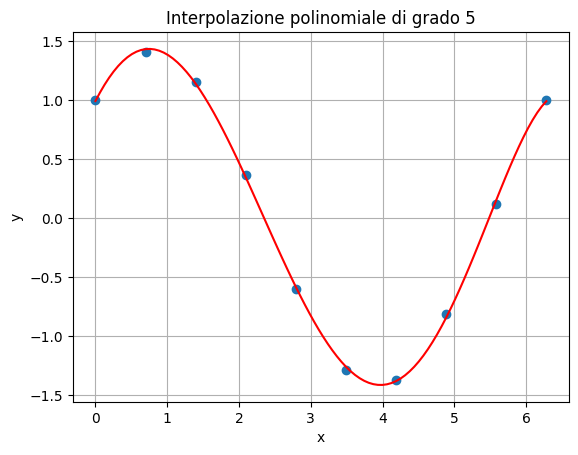

In [5]:
"""3. Per ciascun valore di n ∈ {1, 2, 3, 5, 7}, creare una figura con il grafico 
    della funzione esatta f(x) insieme a quello del polinomio di approssimazione p(x), 
    evidenziando gli m punti noti."""
x_plot = np.linspace(x[0], x[-1], m_plot)
A_plot = np.zeros((m_plot, n+1))

for i in range(n+1):
  A_plot[:, i] = x_plot**i

y_interpolation = A_plot@alpha_svd #alpha_svd = c

plt.plot(x, y, 'o') #x  parte di dati da approx
plt.plot(x_plot, y_interpolation, 'r') #x_plot  vettore(ascissa) che  si necessta x rappresentare dati sul plot
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Interpolazione polinomiale di grado {n}')
plt.grid()
plt.show()

In [6]:
"""4. Per ciascun valore di n ∈ {1, 2, 3, 5, 7}, calcolare e stampare il valore del 
    residuo in norma 2 commesso nei punti xi."""
res = np.linalg.norm(y - A@alpha_svd)
print('Residual: ', res)

Residual:  0.06559431617548454
